In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim

from utils import load_mnist
from trainer import Trainer

In [2]:
def show_image(x):
    if x.dim() == 1:
        x = x.view(int(x.size(0) ** .5), -1)

    plt.imshow(x, cmap='gray')
    plt.show()

In [3]:
from argparse import Namespace

config = {
    'train_ratio': .8,
    'batch_size': 256,
    'n_epochs': 10,
    'verbose': 1,
    'btl_size': 2
}

config = Namespace(**config)

print(config)

Namespace(batch_size=256, btl_size=2, n_epochs=10, train_ratio=0.8, verbose=1)


In [4]:
train_x, train_y = load_mnist()
test_x, test_y = load_mnist(is_train=False)

train_cnt = int(train_x.size(0) * config.train_ratio)
valid_cnt = train_x.size(0) - train_cnt

#shuffle dataset to split into train/valid set
indices = torch.randperm(train_x.size(0))
train_x, valid_x = torch.index_select(train_x, dim=0, index=indices).split([train_cnt, valid_cnt], dim=0)
train_y, valid_y = torch.index_select(train_y, dim=0, index=indices).split([train_cnt, valid_cnt], dim=0)

print("Train:", train_x.shape, train_y.shape)
print("Valid:", valid_x.shape, valid_y.shape)
print("Test:", test_x.shape, test_y.shape)


0it [00:00, ?it/s]

Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw


0it [00:00, ?it/s]

Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw


0it [00:00, ?it/s]

Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw


0it [00:00, ?it/s]

Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw
Processing...
Done!
Train: torch.Size([48000, 784]) torch.Size([48000])
Valid: torch.Size([12000, 784]) torch.Size([12000])
Test: torch.Size([10000, 784]) torch.Size([10000])


In [5]:
from model import Autoencoder

In [6]:
model = Autoencoder(btl_size=config.btl_size)
optimizer = optim.Adam(model.parameters())
crit = nn.MSELoss()

trainer = Trainer(model, optimizer, crit)

In [7]:
trainer.train((train_x, train_x), (valid_x, valid_x), config)

Epoch (1 / 10): train_loss=0.0721 valid_loss=0.0497 lowest_loss=0.0497
Epoch (2 / 10): train_loss=0.0478 valid_loss=0.0451 lowest_loss=0.0451
Epoch (3 / 10): train_loss=0.0452 valid_loss=0.0436 lowest_loss=0.0436
Epoch (4 / 10): train_loss=0.0441 valid_loss=0.0421 lowest_loss=0.0421
Epoch (5 / 10): train_loss=0.0430 valid_loss=0.0416 lowest_loss=0.0416
Epoch (6 / 10): train_loss=0.0421 valid_loss=0.0415 lowest_loss=0.0415
Epoch (7 / 10): train_loss=0.0417 valid_loss=0.0404 lowest_loss=0.0404
Epoch (8 / 10): train_loss=0.0413 valid_loss=0.0398 lowest_loss=0.0398
Epoch (9 / 10): train_loss=0.0413 valid_loss=0.0403 lowest_loss=0.0398
Epoch (10 / 10): train_loss=0.0406 valid_loss=0.0394 lowest_loss=0.0394


## Mean value in each space

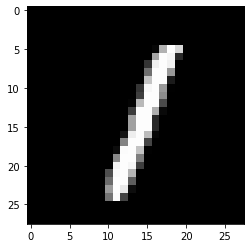

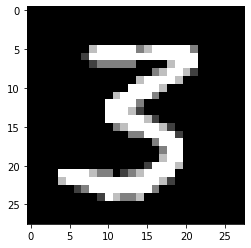

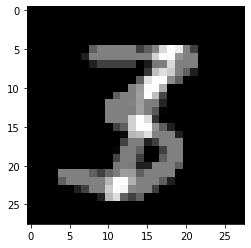

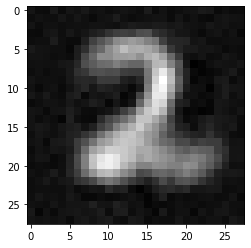

In [8]:
with torch.no_grad():
    import random

    index1 = int(random.random() * test_x.size(0))
    index2 = int(random.random() * test_x.size(0))

    z1 = model.encoder(test_x[index1].view(1, -1))
    z2 = model.encoder(test_x[index2].view(1, -1))

    recon = model.decoder((z1 + z2) / 2).squeeze()

    show_image(test_x[index1])
    show_image(test_x[index2])
    show_image((test_x[index1] + test_x[index2]) / 2)
    show_image(recon) ## mamifold상에 표현되는 형식